In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('D:\GitHub\sp500\sp500_diff.csv', low_memory=False)
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)
df.sort_values(by=['Ticker', 'Date'], inplace=True)
df.drop(['Quarter_pct_diff_1', 'Quarter_pct_diff_4',
        'Fiscal year_pct_diff_1', 'Fiscal year_pct_diff_4', 'Fiscal year'], axis=1, inplace=True)
df['Quarter'] = df['Quarter'].astype('int64').astype('category')
print(df.shape)

target = 'Future_Price_pct_diff_1'
df[target] = df.groupby('Ticker')['ClosePrice_pct_diff_1'].shift(-1)

predict_df = pd.DataFrame()
for ticker in df['Ticker'].unique():
    ticker_df = df[df['Ticker'] == ticker]
    max_date = ticker_df['Date'].max()
    last_row = ticker_df.loc[ticker_df['Date'] == max_date, :].copy()
    predict_df = pd.concat([predict_df, last_row], ignore_index=True)

df.dropna(inplace=True)
features = df.drop(columns=[target,  'Date'], axis=1).columns.tolist()
cat_features = df.drop(columns=[target, 'Date'], axis=1).select_dtypes(
    include=['object', 'category']).columns.tolist()
num_features = df.drop(columns=[target], axis=1).select_dtypes(
    include=['int64', 'float64']).columns.tolist()
print(
    f'Length of numerical features: {len(num_features)}, categorical: {len(cat_features)} , all features: {len(features)}')

(17445, 1134)
Length of numerical features: 1129, categorical: 4 , all features: 1133


In [7]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

C:\Users\Dell\AppData\Local\Temp\ipykernel_42824\2865486665.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



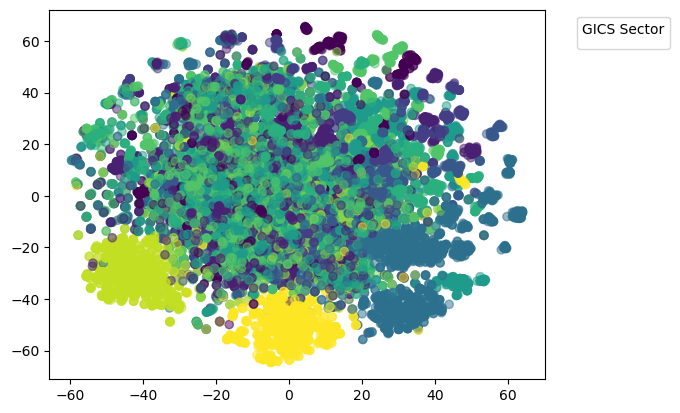

In [ ]:
model = TSNE(learning_rate=100) 
transformed = model.fit_transform(df_scaled) 
xs = transformed[:,0] 
ys = transformed[:,1] 
plt.scatter(xs, ys, alpha=0.5, c=df['GICS Sector'].astype('category').cat.codes) 
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='GICS Sector')
plt.show()

In [48]:
df[cat_features]

,Ticker,Quarter,GICS Sector,GICS Sub-Industry
0,A,4,Health Care,Life Sciences Tools & Services
1,A,1,Health Care,Life Sciences Tools & Services
2,A,2,Health Care,Life Sciences Tools & Services
3,A,3,Health Care,Life Sciences Tools & Services
4,A,4,Health Care,Life Sciences Tools & Services
...,...,...,...,...
17439,ZTS,1,Health Care,Pharmaceuticals
17440,ZTS,2,Health Care,Pharmaceuticals
17441,ZTS,3,Health Care,Pharmaceuticals
17442,ZTS,4,Health Care,Pharmaceuticals


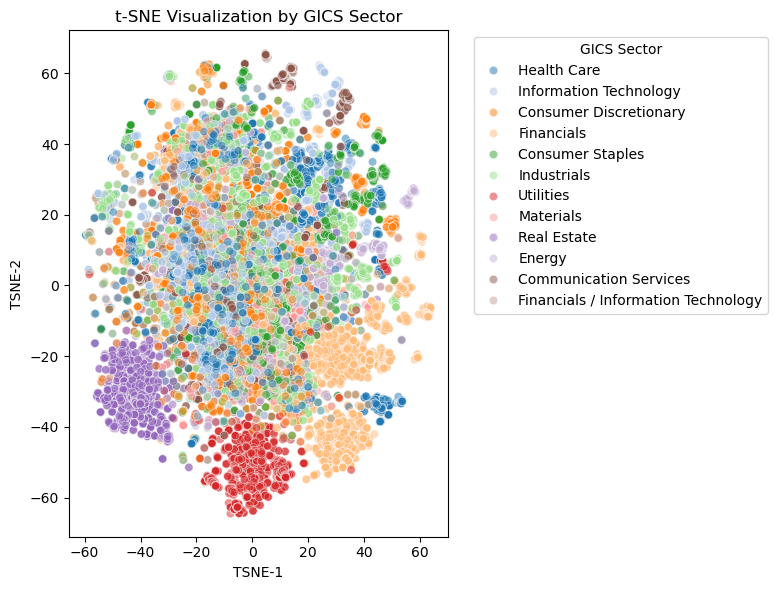

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = TSNE(learning_rate=100, random_state=0)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sector',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()


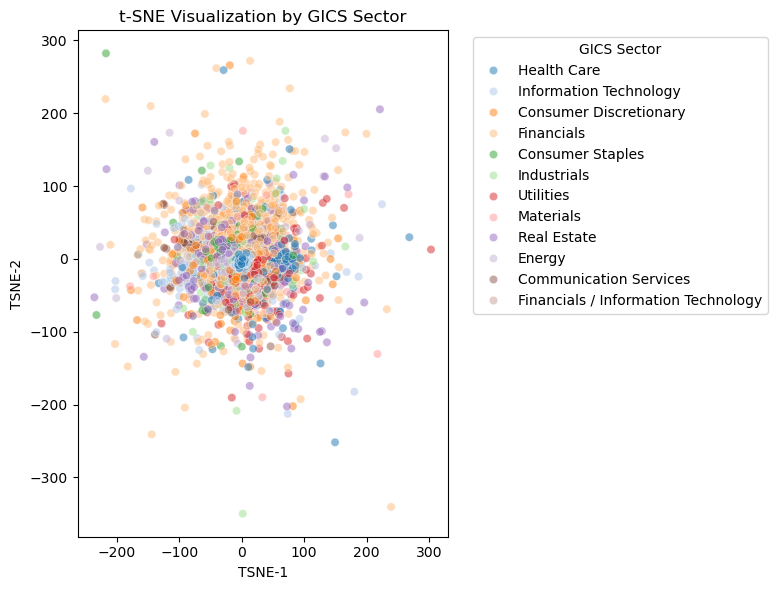

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = GaussianRandomProjection(n_components=2, random_state=0, eps=0.01)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sector',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()


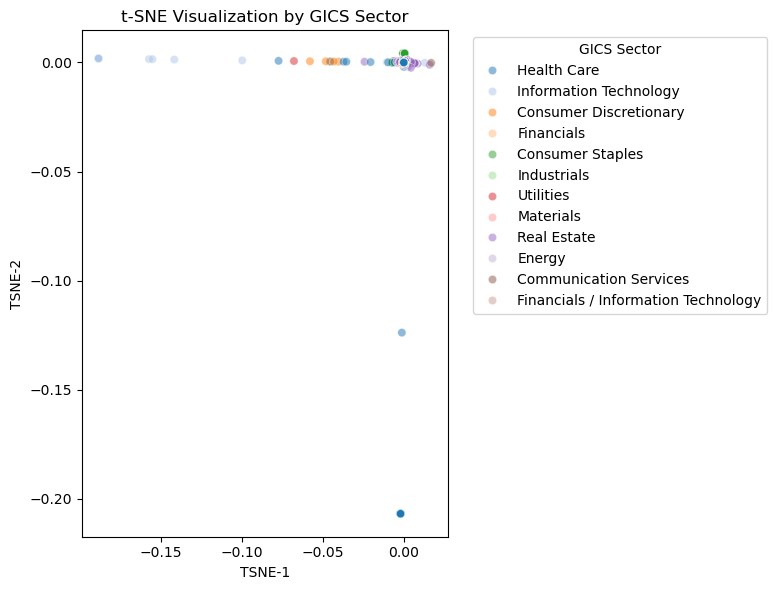

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = LocallyLinearEmbedding(n_components=2, random_state=0)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sector',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')A
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()


c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning:

The default value of `n_init` will change from 4 to 1 in 1.9.



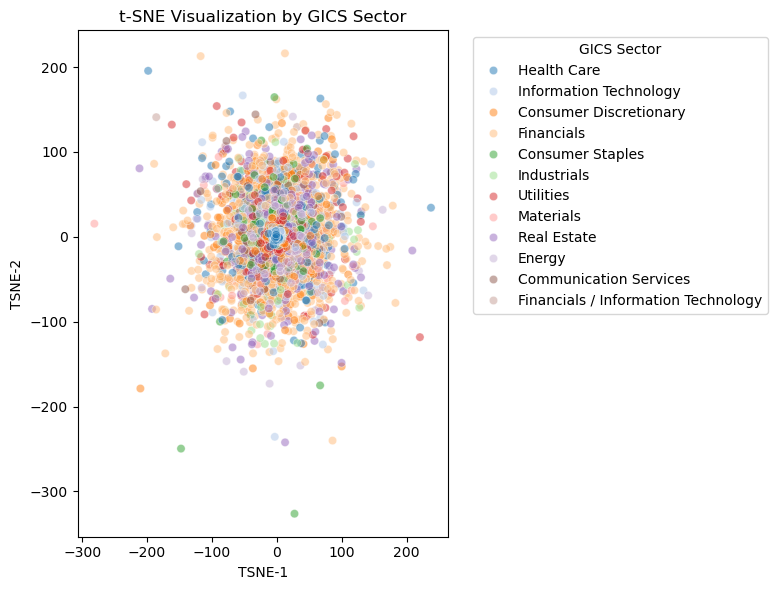

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = MDS(n_components=2, random_state=0)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sector',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()


c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.

c:\Users\Dell\miniforge3\envs\gpu311\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning:

Chan

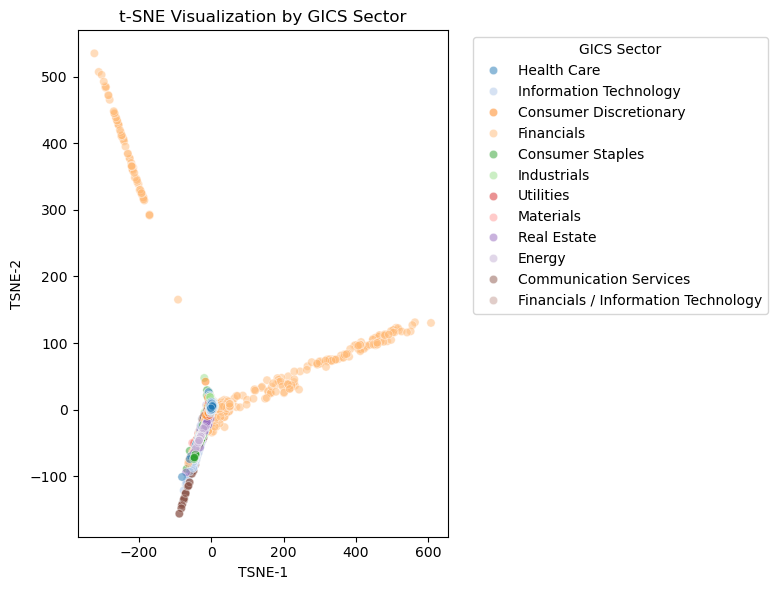

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap 
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = Isomap(n_components=2)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sector',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_42824\1013002353.py:29: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



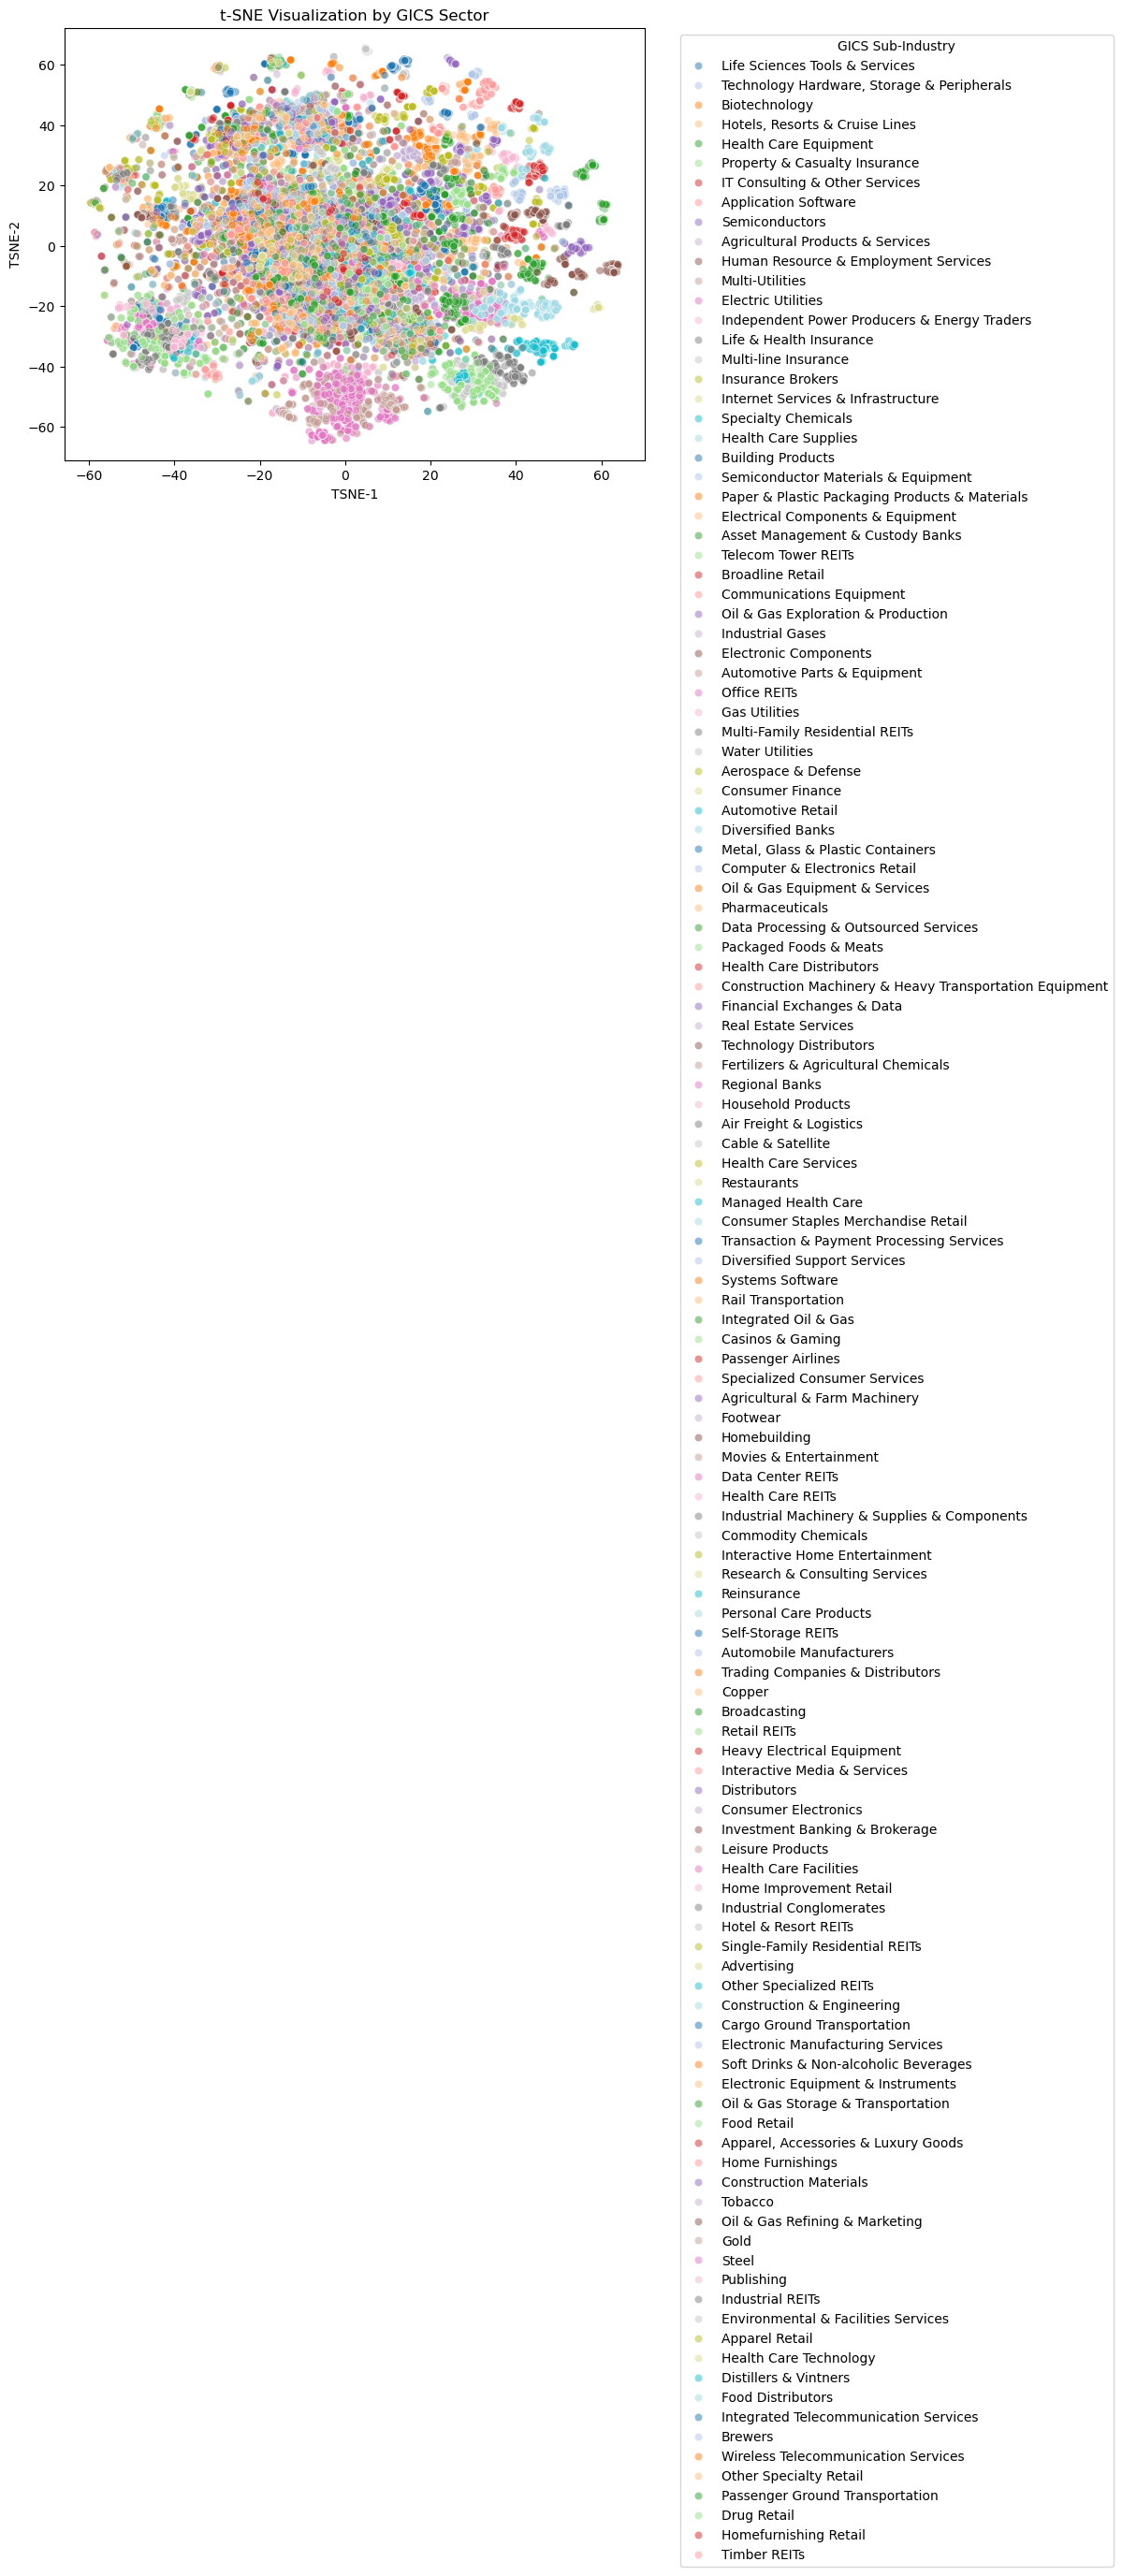

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_features])

# t-SNE transform
model = TSNE(learning_rate=100, random_state=0)
transformed = model.fit_transform(df_scaled)

# Add t-SNE coordinates to the dataframe
df['TSNE-1'] = transformed[:, 0]
df['TSNE-2'] = transformed[:, 1]

# Plot with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='TSNE-1', y='TSNE-2',
    hue='GICS Sub-Industry',          # automatically colors by category
    palette='tab20',            # consistent color palette
    alpha=0.5
)
plt.title('t-SNE Visualization by GICS Sector')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='GICS Sub-Industry')
plt.tight_layout()
plt.show()


Explained variance ratio by 2 components: [0.03777504 0.02434617]
Total explained variance by 2 components: 0.062121202770127296


C:\Users\Dell\AppData\Local\Temp\ipykernel_42824\1061739822.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='GICS Sector')


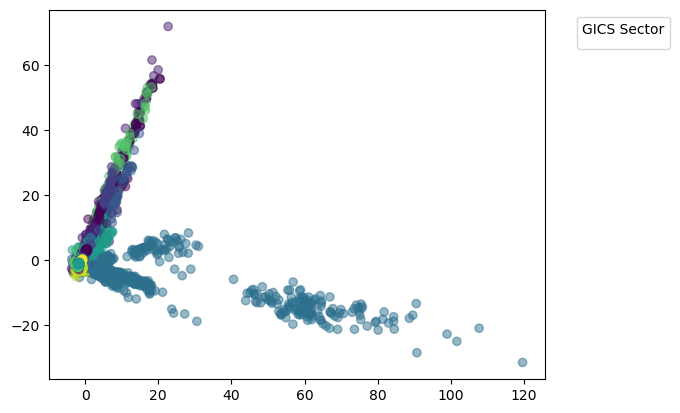

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(df_scaled)
print(f'Explained variance ratio by 2 components: {pca.explained_variance_ratio_}')
print(f'Total explained variance by 2 components: {sum(pca.explained_variance_ratio_)}')
plt.scatter(X_reduced[:,0], X_reduced[:,1], alpha=0.5, c=df['GICS Sector'].astype('category').cat.codes)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='GICS Sector')
plt.show()

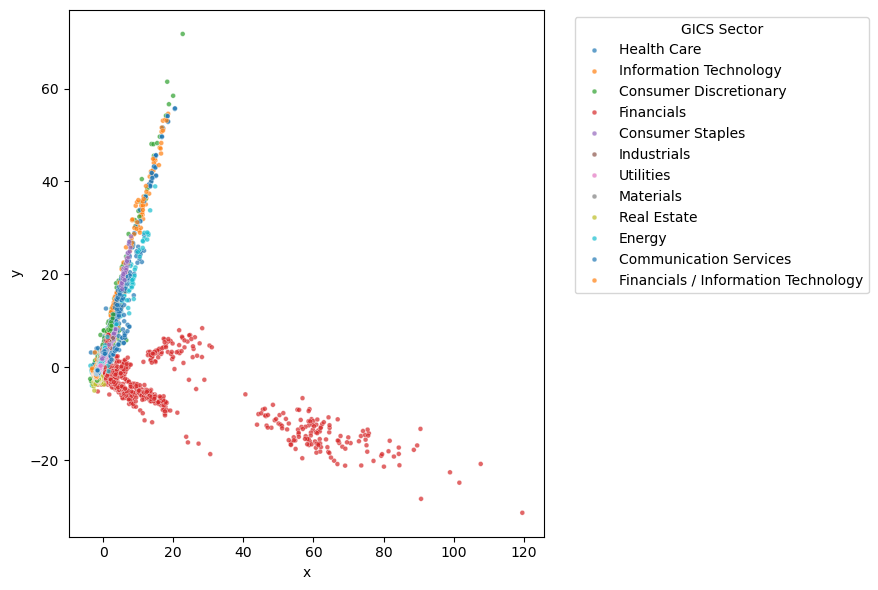

In [37]:
# python
import seaborn as sns
import matplotlib.pyplot as plt

embed = pd.DataFrame(X_reduced, columns=['x','y'])
embed['GICS Sector'] = df['GICS Sector'].values

plt.figure(figsize=(9,6))
sns.scatterplot(data=embed, x='x', y='y', hue='GICS Sector',
                palette='tab10', s=12, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='GICS Sector')
plt.tight_layout()
plt.show()

In [39]:
# python
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

embed = pd.DataFrame(X_reduced, columns=['x','y'])
embed['sector'] = df['GICS Sector'].astype(str).values
sectors = embed['sector'].unique()

# build a trace per sector (easier to control visibility)
fig = go.Figure()
for s in sectors:
    d = embed[embed['sector'] == s]
    fig.add_trace(go.Scatter(x=d['x'], y=d['y'], mode='markers',
                             name=s, marker=dict(size=6), opacity=0.8))

# dropdown: show only selected sector (or all)
buttons = []
# "All" button
buttons.append(dict(method='update',
                    label='All',
                    args=[{'visible': [True]*len(sectors)},
                          {'title': 'All sectors'}]))
for i, s in enumerate(sectors):
    vis = [False]*len(sectors); vis[i] = True
    buttons.append(dict(method='update',
                        label=s,
                        args=[{'visible': vis},
                              {'title': f'Sector: {s}'}]))
fig.update_layout({'updatemenus':[dict(active=0, buttons=buttons, x=1.15, y=0.9)]},
                  title='t-SNE / PCA embedding')
fig.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_42824\586401741.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Dell\AppData\Local\Temp\ipykernel_42824\586401741.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




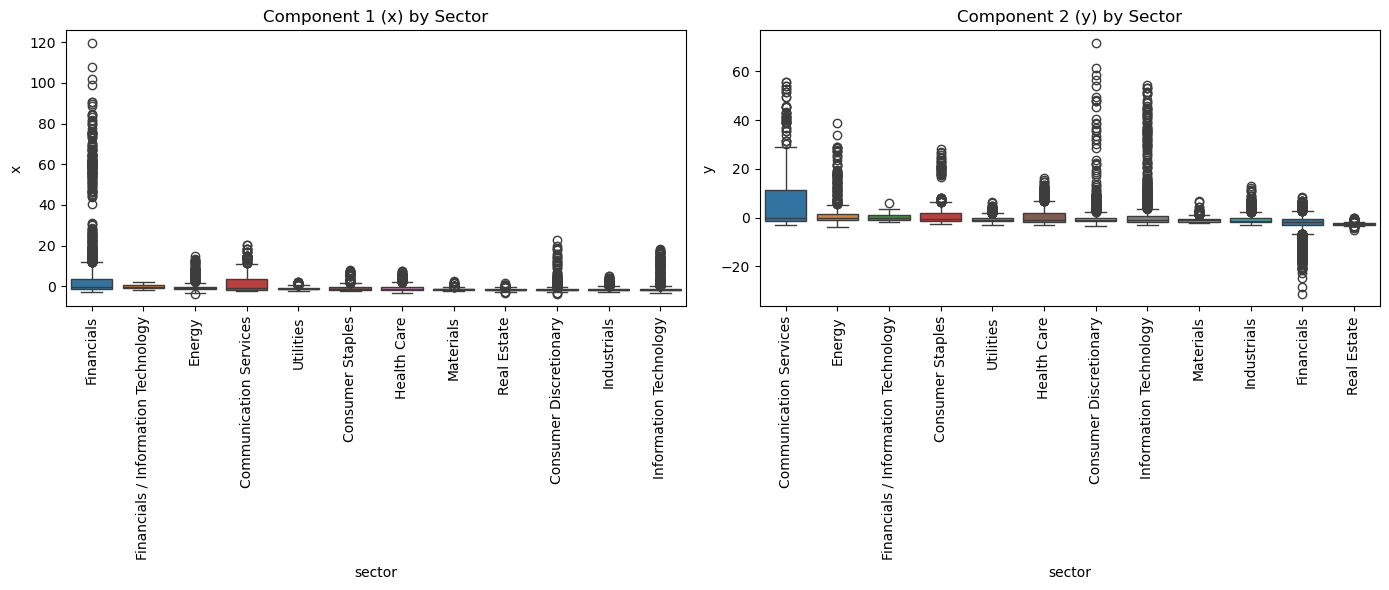

In [40]:
# python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

embed = pd.DataFrame(X_reduced, columns=['x','y'])
embed['sector'] = df['GICS Sector'].astype(str).values

# optional: limit to top N sectors if many
topN = 12
top_sectors = embed['sector'].value_counts().nlargest(topN).index
embed_plot = embed[embed['sector'].isin(top_sectors)].copy()

# order categories by median of x
order_x = embed_plot.groupby('sector')['x'].median().sort_values(ascending=False).index

fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(data=embed_plot, x='sector', y='x', order=order_x, ax=axes[0], palette='tab10')
axes[0].set_title('Component 1 (x) by Sector')
axes[0].tick_params(axis='x', rotation=90)

# order by median of y
order_y = embed_plot.groupby('sector')['y'].median().sort_values(ascending=False).index
sns.boxplot(data=embed_plot, x='sector', y='y', order=order_y, ax=axes[1], palette='tab10')
axes[1].set_title('Component 2 (y) by Sector')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

<Axes: xlabel='GICS Sector', ylabel='Future_Price_pct_diff_1'>

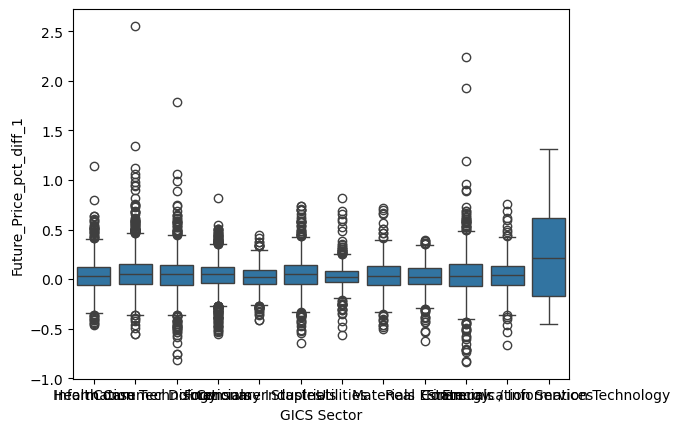

In [42]:
sns.boxplot(data=df, x='GICS Sector', y=target)

In [9]:
#import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(df_scaled)
print(f'Explained variance ratio by 2 components: {pca.explained_variance_ratio_}')
print(f'Total explained variance by 2 components: {sum(pca.explained_variance_ratio_)}')

Explained variance ratio by 2 components: [0.03777504 0.02434617 0.01365359 0.01218456 0.01088488 0.01037955
 0.00947949 0.00884204 0.00735003 0.00679372 0.00670946 0.00646828
 0.00604452 0.00592264 0.00566707 0.00560336 0.00514063 0.00493571
 0.00478871 0.0046157  0.00451573 0.00438874 0.00432597 0.00427369
 0.00416859 0.00406848 0.00393449 0.00387071 0.00364998 0.00350179
 0.00342044 0.00335244 0.00329713 0.00324951 0.00320994 0.00316243
 0.00313588 0.00308207 0.00305282 0.00302485 0.0029961  0.00293982
 0.00288578 0.00286114 0.00279534 0.00276706 0.00273845 0.0027176
 0.00265468 0.00261343 0.00259964 0.00257915 0.00254013 0.00252226
 0.0024795  0.00244107 0.00240293 0.00239236 0.00236438 0.00234363
 0.00231763 0.00230447 0.0022784  0.00226721 0.00225616 0.00224896
 0.00220806 0.0021987  0.00218139 0.00215667 0.00214128 0.00213711
 0.00211356 0.00209201 0.00208839 0.00205862 0.0020414  0.00201414
 0.00199848 0.00199673 0.00198818 0.00195942 0.00194073 0.00192651
 0.00192156 0.0019132

In [10]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(random_seed=0, verbose=0)
model.fit(X_reduced, df[target])
model.score(X_reduced, df[target])

0.703611357724439

In [11]:
model.fit(df[num_features], df[target])
model.score(df[num_features], df[target])

0.6739103309600802